# Henry Pham
# Project 7 - Predicting Graduate Admission

In [1]:
# ---- Project 7 ----

## Introduction

In [2]:
# The objective of this project is to develop a precise and dependable predictive model for forecasting graduate admission outcomes, 
# assisting educational institutions, prospective students, and admissions committees in the selection process. 
# Accurate predictions of graduate admission provide valuable insights for universities and candidates, 
# enabling data-driven decision-making and optimizing the admissions process. 
# By leveraging predictive analytics and historical admissions data, this project aims to streamline the graduate admission process 
# and enhance transparency for all stakeholders.

## Data Sources

In [3]:
# GraduateAddission: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

## Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

## Get Graduate Admission Data

In [5]:
# Import few libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read csv file using pandas
df = pd.read_csv('C:\\DSC680\\PracticeMachineLearning\\Admission_Predict.csv')

## Data Cleaning

In [7]:
# Show few records
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Find shape of the dataset 

In [8]:
# Retrieve the dimensions of a DataFrame df
df.shape

(400, 9)

In [9]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 400
Number of Columns 9


## Get information About the dataset

In [10]:
# Provide a concise summary of the DataFrame df, including information about the index, column data types, 
# non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


## Check missing values

In [11]:
# Calculate the number of missing values (null values) in each column of the DataFrame df
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
# There is no missing values in the dataset.

## Check duplicates

In [13]:
# Count the number of duplicated rows in the DataFrame df
df.duplicated().sum()

0

In [14]:
# There is no duplicates

## Get an overall stats summary

In [15]:
# Generate descriptive statistics of the numerical columns in a DataFrame.
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Drop features that are not useful

In [16]:
# SerialNo - It does not provide any meaningful information related to the target variable.
df = df.drop('Serial No.',axis=1)

In [17]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Outliers Detection

In [18]:
# Subset the data for the variable of GRE Score
gre = df['GRE Score']

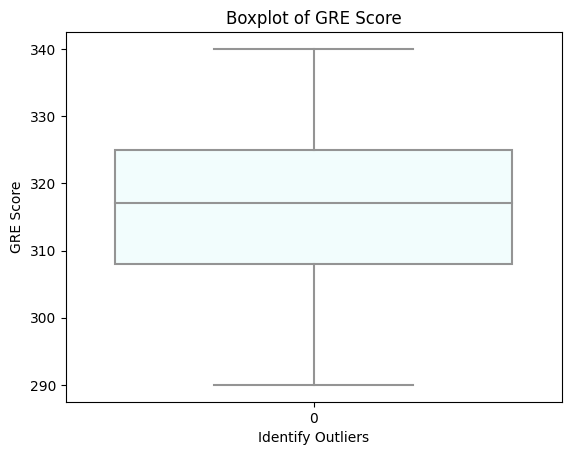

In [19]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of GRE score using seaborn
sns.boxplot(gre, color='azure')

# Add a title
plt.title("Boxplot of GRE Score")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("GRE Score")

# Show the plot
plt.show()

In [20]:
# I calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [21]:
# Calculate the mean, median, and standard deviation for GRE
mean = gre.mean()
median = gre.median()
std = gre.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (gre - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "gre" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = gre[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: GRE Score, dtype: int64)


In [22]:
# There is no outliers for GRE score in the z-scores method.

In [23]:
# Subset the data for the variable of Toefle Score
toefl = df['TOEFL Score']

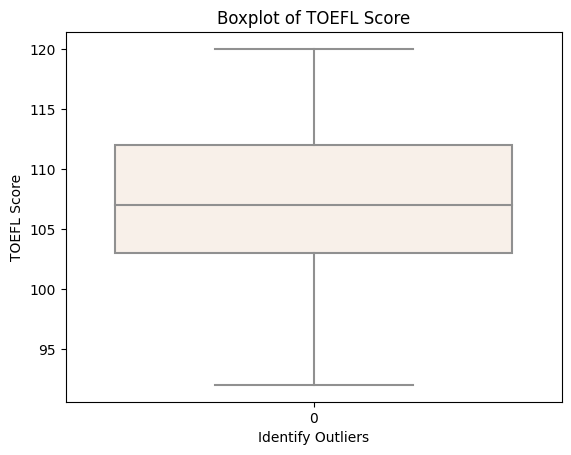

In [24]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of GRE score using seaborn
sns.boxplot(toefl, color='linen')

# Add a title
plt.title("Boxplot of TOEFL Score")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("TOEFL Score")

# Show the plot
plt.show()

In [25]:
# Calculate the mean, median, and standard deviation for GRE
mean = toefl.mean()
median = toefl.median()
std = toefl.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (toefl - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "toefl" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = toefl[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: TOEFL Score, dtype: int64)


In [26]:
# There is no outliers for toefle score in the z-scores method.

## Correlation Heatmap

In [27]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

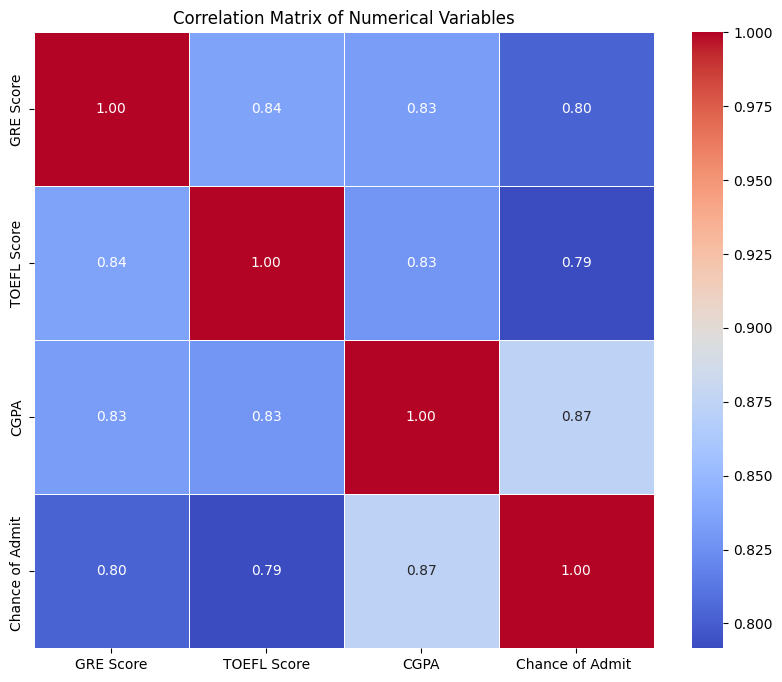

In [28]:
# Select numerical columns for correlation analysis
numerical_columns = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit ']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [29]:
# The heatmap helps to identify the relationships and dependencies between variables. 
# Positive correlations are indicated by red, while negative correlations are indicated by blue/light blue color. 
# The correlation coefficients displayed on the heatmap provide a numerical measure of the strength and direction of the correlations.

# The correlation between Admit and GRE is positive, meaning, the chance of admitted is likely as the GRE score increases.
# The correlation between Admit and Toefl is positive, meaning, the chance of admitted is likely as the Toefl score increases.
# The correlation between Admit and CGPA is positive, meaning, the chance of admitted is likely as the CGPA score increases.


## Scatter Plot Admit Vs. GRE Score

In [30]:
# Subset the data for the variables of interest 
amit = df['Chance of Admit ']
gre = df['GRE Score']

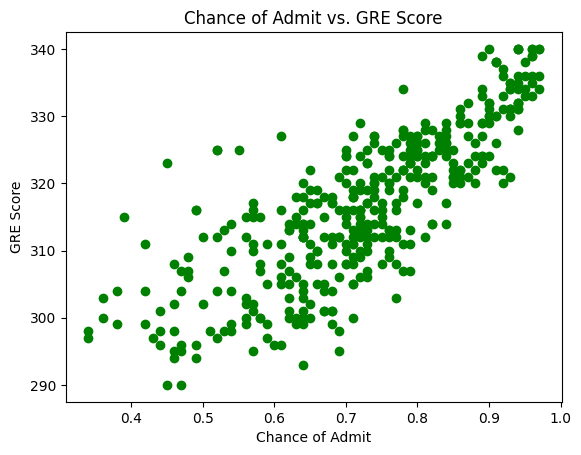

In [31]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Admit Vs. GRE
# Admit represents the x-axis values, and GRE represents the y-axis values. 
# Each data point is represented as a single point on the plot, 
# where the x-coordinate corresponds to the Admit, and the y-coordinate corresponds to the GRE.
plt.scatter(amit, gre, color='g')
# Set the label for the x-axis as "Admit"
plt.xlabel('Chance of Admit')
# Set the label for the y-axis as "GRE."
plt.ylabel('GRE Score')
# Set the title of the scatter plot as "Admit vs. GRE."
plt.title('Chance of Admit vs. GRE Score')
# Display the plot
plt.show()

## Scatter Plot Admit Vs. Toefl Score

In [32]:
# Subset the data for the variables of interest 
amit = df['Chance of Admit ']
toefl = df['TOEFL Score']

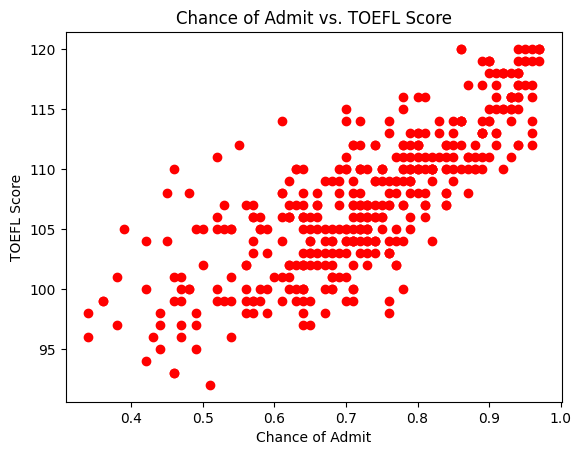

In [33]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Admit Vs. TOEFL
# Admit represents the x-axis values, and TOEFL represents the y-axis values. 
# Each data point is represented as a single point on the plot, 
# where the x-coordinate corresponds to the Admit, and the y-coordinate corresponds to the TOEFL.
plt.scatter(amit, toefl, color='r')
# Set the label for the x-axis as "Admit"
plt.xlabel('Chance of Admit')
# Set the label for the y-axis as "toefl."
plt.ylabel('TOEFL Score')
# Set the title of the scatter plot as "Admit vs. toefl."
plt.title('Chance of Admit vs. TOEFL Score')
# Display the plot
plt.show()

## Analyze their relationships

In [34]:
# Import few libraries
import pandas as pd
import numpy as np

# Calculate the covariance and Pearson's correlation coefficients for the two pairs of variables.

# This line calculates the covariance between the Admit and GRE variables using the cov() function from NumPy. 
# The cov() function returns a covariance matrix, and I select the value at index [0][1] 
# to obtain the covariance between the two variables.
admit_gre_cov = np.cov(amit,gre)[0][1]

# This line calculates the Pearson's correlation coefficient between the Admit and GRE variables 
# using the corrcoef() function from NumPy. 
# The corrcoef() function returns a correlation matrix, and I select the value at index [0][1] 
# to obtain the correlation coefficient between the two variables.
admit_gre_corr = np.corrcoef(amit, gre)[0][1]

# This line calculates the covariance between the Admit and Toefl variables in the same way as explained above.
admit_toefl_cov = np.cov(amit, toefl)[0][1]

# This line calculates the Pearson's correlation coefficient between the SPY and 
# Inflation variables in the same way as explained above.
admit_toefl_corr = np.corrcoef(amit, toefl)[0][1]



# Print the covariance and Pearson's correlation coefficients
print(f'Admit and GRE: Covariance = {admit_gre_cov:.2f}, Pearson\'s Correlation = {admit_gre_corr:.2f}')
print(f'Admit and Toefl: Covariance = {admit_toefl_cov:.2f}, Pearson\'s Correlation = {admit_toefl_corr:.2f}')

Admit and GRE: Covariance = 1.31, Pearson's Correlation = 0.80
Admit and Toefl: Covariance = 0.69, Pearson's Correlation = 0.79


In [35]:
# Covariance measures the linear relationship between two variables and provides information about 
# the direction and magnitude of their association. A positive covariance indicates a positive relationship, 
# while a negative covariance indicates a negative relationship.

# Pearson's correlation coefficient is a standardized measure of the linear relationship between two variables. 
# It ranges from -1 to +1, with values closer to +1 indicating a strong positive correlation, 
# values closer to -1 indicating a strong negative correlation, 
# and values close to 0 indicating little or no linear correlation.

# Analyzing the scatter plots, I can gain insights into the correlation and potential causation between the two variables.

# 1st scatter plot: I can see that there is a positive correlation between Admit and the GRE score. 
# As GRE score increases, the chance of Admit is likely.

# 2nd scatter plot: I can see that there is a positive correlation of 0.79 between Admit and Toefl score.
# It suggests a positive linear relationship.

## Store Feature Matrix In X and Response(Target) In Vector y

In [36]:
# This line creates a new DataFrame X by dropping the column labeled 'Chance of Admit ' from the original DataFrame df
X = df.drop('Chance of Admit ',axis=1)
# This line creates a Series y containing only the values from the column labeled 'Chance of Admit ' in the original DataFrame df.
# The resulting Series y contains the values of the 'Chance of Admit ' column, which is the target variable I want to predict.
y = df['Chance of Admit ']

## Splitting The Dataset Into The Training Set And Test Set

In [37]:
# Import the train_test_split function from the sklearn.model_selection module and 
# then splits the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# X: This is the DataFrame containing the features (independent variables).
# y: This is the Series containing the target variable (dependent variable).
# test_size=0.20: This parameter specifies the proportion of the dataset that should be included in the test split. 
# In this case, it's set to 0.20, meaning that 20% of the data will be used for testing, 
# and the remaining 80% will be used for training.
# random_state=42: This parameter sets the random seed for reproducibility
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Feature Scaling

In [38]:
# Show few records
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
# This line imports the StandardScaler class from the sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler
# This line creates an instance of the StandardScaler class and assigns it to the variable sc. 
sc = StandardScaler()

In [40]:
# This line standardizes the training features (X_train) by fitting the StandardScaler (sc) 
# to the training data and transforming it. 
X_train=sc.fit_transform(X_train)
# This line standardizes the testing features (X_test) using the mean and standard deviation calculated from the training set.
X_test=sc.transform(X_test)

In [41]:
# Show the result of X_train
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [42]:
# Import numpy library
import numpy as np
# This line creates a new list y_train by iterating over each value in the original y_train list (or array) 
# and assigning a value of 1 if the value is greater than 0.8, and 0 otherwise. 
y_train = [1 if value>0.8 else 0 for value in y_train]
# This line creates a new list y_test by iterating over each value in the original y_test list (or array) 
# and assigning a value of 1 if the value is greater than 0.8, and 0 otherwise.
y_test = [1 if value>0.8 else 0 for value in y_test]
# These lines convert the lists y_train and y_test to NumPy arrays using the np.array() function. 
y_train = np.array(y_train)
y_test = np.array(y_test)

In [43]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

## Import The models

In [44]:
# Import few libraries
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

## Model Training & Evaluation

In [45]:
# This line creates an instance of the LogisticRegression class from scikit-learn's linear_model module
lr = LogisticRegression()
# This line trains the logistic regression model (lr) on the training data (X_train and y_train) using the fit method
lr.fit(X_train,y_train)
# This line uses the trained logistic regression model (lr) to predict the labels for the test data (X_test) using the predict method. 
y_pred_lr= lr.predict(X_test)
# Print the result
print(accuracy_score(y_test,y_pred_lr))

0.925


In [46]:
# Repeat the same for SVM
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print(accuracy_score(y_test,y_pred_svm))

0.925


In [47]:
# Repeat the same for KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

0.8875


In [48]:
# Repeat the same for RF
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

0.925


In [49]:
# Repeat the same for GBC
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred_gr = gr.predict(X_test)
print(accuracy_score(y_test,y_pred_gr))

0.975


In [50]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'ACC_SCORE') 
# and the values are lists containing the corresponding data.
data = pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                           'ACC_SCORE':[accuracy_score(y_test,y_pred_lr),
                                       accuracy_score(y_test,y_pred_svm),
                                       accuracy_score(y_test,y_pred_knn),
                                       accuracy_score(y_test,y_pred_rf),
                                       accuracy_score(y_test,y_pred_gr)]})

In [51]:
# Show the result
data

,Models,ACC_SCORE
0,LR,0.9250
1,SVC,0.9250
2,KNN,0.8875
3,RF,0.9250
4,GBC,0.9750


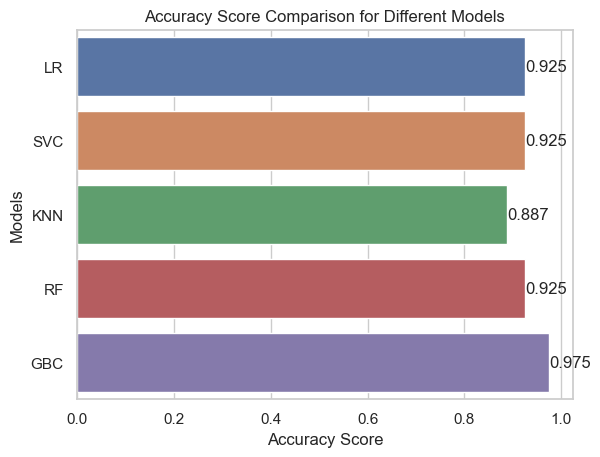

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='ACC_SCORE', y='Models', data=data)

# Adding labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Accuracy Score Comparison for Different Models')

# Add text labels for each bar
for index, row in data.iterrows():
    ax.text(row['ACC_SCORE'], index, f'{row["ACC_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [53]:
# The Gradient Boosting model is the best model.

## Save The Model

In [54]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

In [55]:
y  = [1 if value>0.8 else 0 for value in y]
y = np.array(y)
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [56]:
X = sc.fit_transform(X)
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [57]:
# This line creates an instance of the GradientBoostingClassifier class from the ensemble module in scikit-learn.
gr = GradientBoostingClassifier()
# This line trains (fits) the GradientBoostingClassifier model on the entire dataset X and 
# corresponding target variable y using the fit method.
gr.fit(X,y)

GradientBoostingClassifier()

In [58]:
# Import the joblib library
import joblib
# This line saves the trained GradientBoostingClassifier model (gr) to a file named 'Graduate_Admission_model'. 
joblib.dump(gr,'Graduate_Admission_model')

['Graduate_Admission_model']

In [59]:
# This line loads the previously saved model from the file 'Graduate_Admission_model' and assigns it to the variable 'model'. 
# I can now use this model to make predictions on new data 
model = joblib.load('Graduate_Admission_model')